In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as rsq
from sklearn.metrics import accuracy_score

import seaborn as sns

In [61]:
data=pd.read_csv('ML Data 2.csv')

X = data.drop(['PDL Status'], axis=1)
y=data['PDL Status']
X

Identifier  ST         Pool  Quarter  Year   Period  Units  Scripts  \
0              0  CA  Independent        1  2019  20191.0  367.0      344   
1              1  CA  Independent        1  2019  20191.0  121.0      117   
2              1  CA  Independent        1  2019  20191.0  150.0      102   
3              0  CA  Independent        1  2019  20191.0  215.0      134   
4              0  CA  Independent        1  2019  20191.0    0.0        0   
...          ...  ..          ...      ...   ...      ...    ...      ...   
8566           1  WY         SSDC        2  2023  20232.0   34.0       34   
8567           1  WY         SSDC        2  2023  20232.0   27.0       18   
8568           1  WY         SSDC        2  2023  20232.0   28.5       19   
8569           1  WY         SSDC        2  2023  20232.0   59.0       57   
8570           1  WY         SSDC        2  2023  20232.0    0.0        0   

      Total Amount  Market Share  
0        193834.93      0.550119  
1         70114.28      0.550119  
2         58728.22      0.281623  
3         82688.82      0.281623  
4             0.00      0.168258  
...            ...           ...  
8566      24558.09      0.489130  
8567      12243.06      0.201087  
8568      12979.09      0.201087  
8569      37777.31      0.309783  
8570          0.00      0.309783  

[8571 rows x 10 columns]

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [63]:
train_data = X_train.join(y_train)

In [64]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6856 entries, 3359 to 7717
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Identifier    6856 non-null   int64  
 1   ST            6856 non-null   object 
 2   Pool          6856 non-null   object 
 3   Quarter       6856 non-null   int64  
 4   Year          6856 non-null   int64  
 5   Period        6856 non-null   float64
 6   Units         6856 non-null   float64
 7   Scripts       6856 non-null   int64  
 8   Total Amount  6856 non-null   float64
 9   Market Share  6856 non-null   float64
 10  PDL Status    6856 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 900.8+ KB


array([[<Axes: title={'center': 'Identifier'}>,
        <Axes: title={'center': 'Quarter'}>,
        <Axes: title={'center': 'Year'}>],
       [<Axes: title={'center': 'Period'}>,
        <Axes: title={'center': 'Units'}>,
        <Axes: title={'center': 'Scripts'}>],
       [<Axes: title={'center': 'Total Amount'}>,
        <Axes: title={'center': 'Market Share'}>,
        <Axes: title={'center': 'PDL Status'}>]], dtype=object)

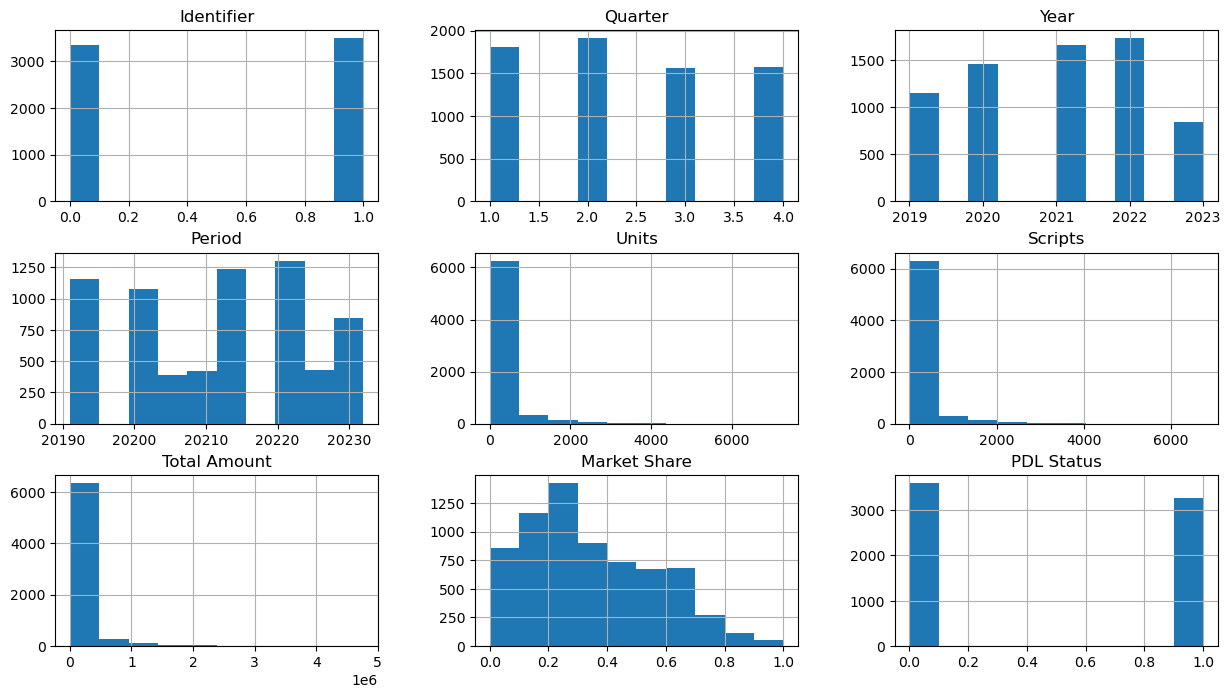

In [65]:
train_data.hist(figsize=(15,8))

<Axes: >

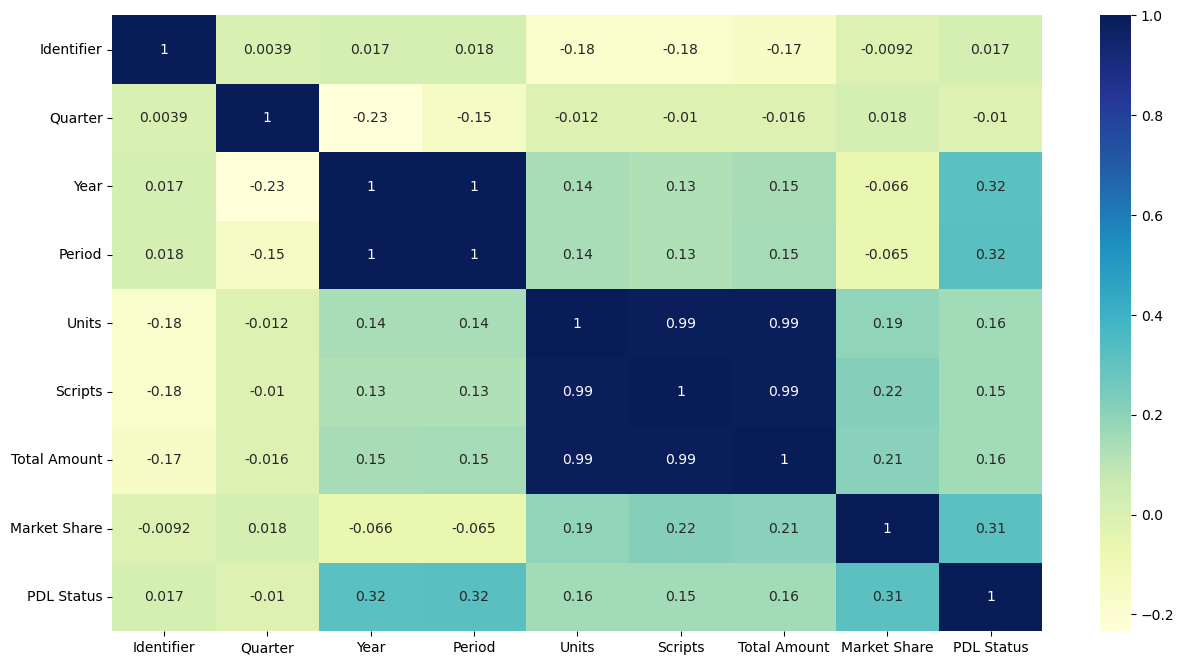

In [66]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot=True, cmap='YlGnBu')

In [67]:
train_data

Identifier  ST         Pool  Quarter  Year   Period   Units  Scripts  \
3359           1  GA  Independent        1  2021  20211.0   120.0      114   
5116           0  NH         NMPI        4  2021  20214.0    30.0       30   
1090           1  GA  Independent        4  2019  20194.0     0.0        0   
3157           0  RI         NMPI        4  2020  20204.0   116.0      116   
319            0  FL  Independent        2  2019  20192.0    28.0       25   
...          ...  ..          ...      ...   ...      ...     ...      ...   
6861           0  RI         NMPI        3  2022  20223.0    35.0       35   
2623           0  NY         NMPI        3  2020  20203.0  1428.0     1352   
8238           1  LA         TOP$        2  2023  20232.0     0.0        0   
697            1  IA         SSDC        3  2019  20193.0     0.0        0   
7717           1  MA  Independent        1  2023  20231.0   158.0      158   

      Total Amount  Market Share  PDL Status  
3359      73342.40      0.525568           0  
5116      18455.70      0.247508           0  
1090          0.00      0.282334           0  
3157      65985.02      0.329819           0  
319       15697.62      0.425173           0  
...            ...           ...         ...  
6861      22260.03      0.378653           1  
2623     837393.93      0.258632           1  
8238          0.00      0.165295           0  
697           0.00      0.580531           0  
7717     109057.84      0.243334           0  

[6856 rows x 11 columns]

In [68]:
train_data = train_data.join(pd.get_dummies(train_data.Pool).astype(int)).drop(['Pool'], axis=1)
train_data = train_data.join(pd.get_dummies(train_data.ST).astype(int)).drop(['ST'], axis=1)

In [69]:
test_data = X_test.join(y_test)

test_data = test_data.join(pd.get_dummies(test_data.Pool).astype(int)).drop(['Pool'], axis=1)
test_data = test_data.join(pd.get_dummies(test_data.ST).astype(int)).drop(['ST'], axis=1)

In [70]:
X_train, y_train = train_data.drop(['PDL Status'], axis=1), train_data['PDL Status']
X_test, y_test = test_data.drop(['PDL Status'], axis=1), test_data['PDL Status']

<Axes: >

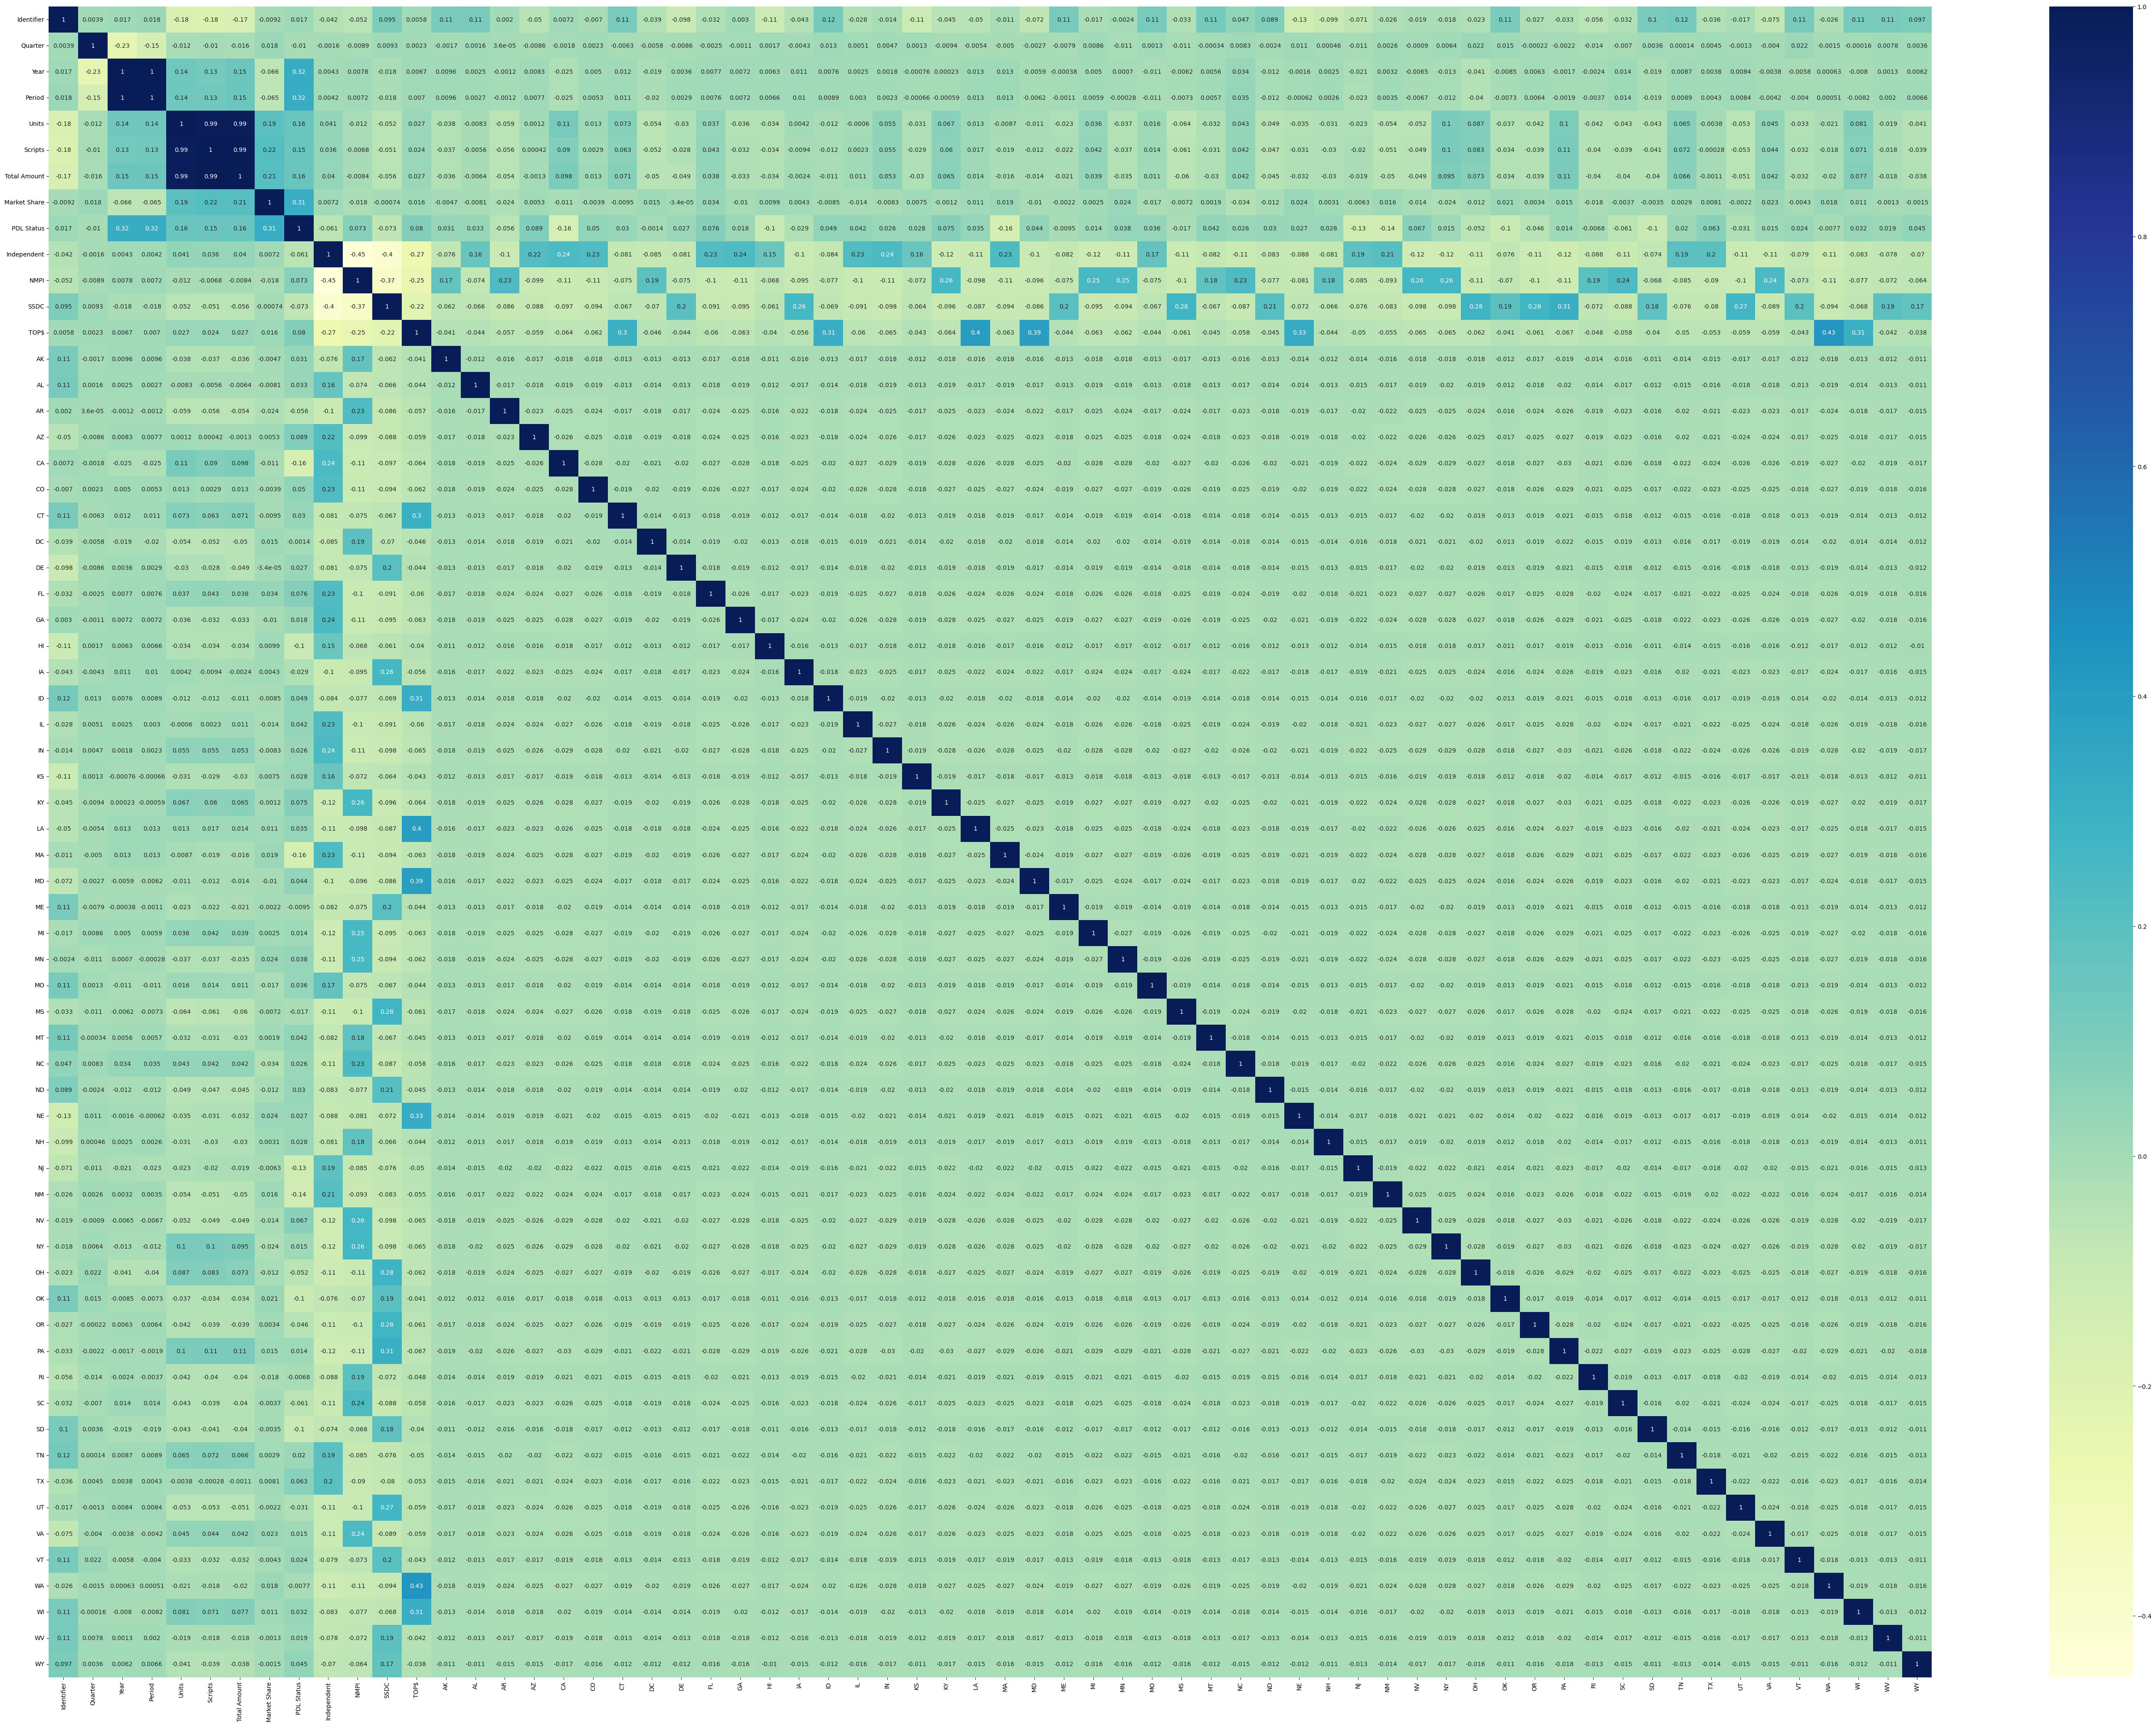

In [71]:
plt.figure(figsize=(70,50))
sns.heatmap(train_data.corr(numeric_only=True),annot=True, cmap='YlGnBu')

In [13]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9317784256559767

In [14]:
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier()

param_grid = {
    "n_estimators": [50, 75, 100],
    "max_features": [50,75,100]
}


grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy", return_train_score=True)

print(grid_search.fit(X_train, y_train))
print(grid_search.best_estimator_)
print(grid_search.best_estimator_.score(X_test, y_test))

KeyboardInterrupt: 

In [14]:
model = RandomForestClassifier(max_features=100)
model.fit(X_train, y_train)

RandomForestClassifier(max_features=100)

In [15]:
model.score(X_test, y_test)

0.9720116618075801

## Neural  Network

In [72]:
print(X_train.shape)

(6856, 63)


In [73]:
new_y = []
for i in y_train:
    if i == 0:
        new_y.append([1, 0])
    else:
        new_y.append([0,1])
        
new_y = np.array(new_y)      
print(new_y)

[[1 0]
 [1 0]
 [1 0]
 ...
 [1 0]
 [1 0]
 [1 0]]


In [76]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_dim=63))
model.add(layers.Dense(512, activation='relu', input_dim=512))
model.add(layers.Dense(512, activation='relu', input_dim=512))
model.add(layers.Dense(512, activation='relu', input_dim=512))
model.add(layers.Dense(512, activation='relu', input_dim=512))
model.add(layers.Dense(2, activation='softmax', input_dim=512))

model.compile(loss='categorical_crossentropy', metrics='accuracy', optimizer='sgd')

model.fit(X_train, new_y, epochs=10, batch_size=64)

pred_y = np.argmax(model.predict(X_train), axis=1)
accuracy_score(pred_y, y_train)

Epoch 1/10
108/108 [==============================] - 1s 6ms/step - loss: nan - accuracy: 0.5238
Epoch 2/10
108/108 [==============================] - 1s 6ms/step - loss: nan - accuracy: 0.5244
Epoch 3/10
108/108 [==============================] - 1s 6ms/step - loss: nan - accuracy: 0.5244
Epoch 4/10
108/108 [==============================] - 1s 6ms/step - loss: nan - accuracy: 0.5244
Epoch 5/10
108/108 [==============================] - 1s 6ms/step - loss: nan - accuracy: 0.5244
Epoch 6/10
108/108 [==============================] - 1s 6ms/step - loss: nan - accuracy: 0.5244
Epoch 7/10
108/108 [==============================] - 1s 6ms/step - loss: nan - accuracy: 0.5244
Epoch 8/10
108/108 [==============================] - 1s 6ms/step - loss: nan - accuracy: 0.5244
Epoch 9/10
108/108 [==============================] - 1s 6ms/step - loss: nan - accuracy: 0.5244
Epoch 10/10
215/215 [==============================] - 0s 2ms/step


0.5243582263710619